In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt



# Load filtered dataset
file_path = "data/China Military Diplomacy DB 2002-2024 v499 02-14-2025 BETA.xlsx"
df = pd.read_excel(file_path, sheet_name="PLA Military Diplomacy DB v499")

# Filter for China-Russia interactions
df_russia_china = df[df["Partner Country"] == "Russia"]




In [4]:
df.head()

,Activity Category,Geographic Region,Region (MND FAO),PRC Relationship Category,U.S. Collective Defense Status,US CCMD AOR,Partner Country,Year,Month,Activity Type,...,MilEx Type,MilEx Name,MilEx Service,MilEx Details,Port Call Voyage Identifier,Associated Fleet,Port Call Details,Source,Comments,Unnamed: 26
0,Naval Port Call,South Asia,Asia,No Specific Relationship,NaN,INDOPACOM,Bangladesh,1985,11.0,Port Call - Friendly Visit,...,NaN,NaN,NaN,NaN,NETF: 1985-11 DD132 Hefei,East Sea Fleet,Hefei-132 and Fengcang-615,NaN,NaN,NaN
1,Naval Port Call,Southeast Asia,Asia,No Specific Relationship,NaN,INDOPACOM,Myanmar,1985,11.0,Port Call - Friendly Visit,...,NaN,NaN,NaN,NaN,NETF: 1985,Unknown,???,NaN,NaN,NaN
2,Naval Port Call,South Asia,Asia,No Specific Relationship,Major Non-NATO Ally,CENTCOM,Pakistan,1985,11.0,Port Call - Friendly Visit,...,NaN,NaN,NaN,NaN,NETF: 1985-11 DD132 Hefei,East Sea Fleet,Hefei-132 and Fengcang-615,NaN,NaN,NaN
3,Naval Port Call,South Asia,Asia,No Specific Relationship,NaN,INDOPACOM,Sri Lanka,1985,11.0,Port Call - Friendly Visit,...,NaN,NaN,NaN,NaN,NETF: 1985-11 DD132 Hefei,East Sea Fleet,Hefei-132 and Fengcang-615,NaN,NaN,NaN
4,Naval Port Call,North America,America and Oceania,No Specific Relationship,NaN,NORTHCOM,United States,1989,3.0,Port Call - Friendly Visit,...,NaN,NaN,NaN,NaN,NETF: 1989-03 Zhenghe,North Sea Fleet,Zhenghe training ship,NaN,NaN,NaN


In [5]:
df_russia_china.head()

,Activity Category,Geographic Region,Region (MND FAO),PRC Relationship Category,U.S. Collective Defense Status,US CCMD AOR,Partner Country,Year,Month,Activity Type,...,MilEx Type,MilEx Name,MilEx Service,MilEx Details,Port Call Voyage Identifier,Associated Fleet,Port Call Details,Source,Comments,Unnamed: 26
10,Naval Port Call,Russia,Europe and Central Asia,No Specific Relationship,NaN,EUCOM,Russia,1994,5.0,Port Call - Friendly Visit,...,NaN,NaN,NaN,NaN,NETF: 1994-05 DD166 Zhuhai,All,"Dajiang Sub Tender Changxingdao 121, Luda-II d...",NaN,NaN,NaN
12,Naval Port Call,Russia,Europe and Central Asia,No Specific Relationship,NaN,EUCOM,Russia,1995,8.0,Port Call - Friendly Visit,...,NaN,NaN,NaN,NaN,NETF: 1995-08 FFG541 Huaibei,East Sea Fleet,Jiangwei frigate Huaibei 541,NaN,NaN,NaN
14,Naval Port Call,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],NaN,EUCOM,Russia,1996,7.0,Port Call - Friendly Visit,...,NaN,NaN,NaN,NaN,NETF: 1996-07 DD112 Harbin,North Sea Fleet,Luhu destroyer Harbin 112,NaN,NaN,NaN
88,Senior Level Visit,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],NaN,EUCOM,Russia,2002,6.0,BL - Hosted,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CPP20020601000085,NaN,NaN
102,Senior Level Visit,Russia,Europe and Central Asia,Strategic Partnership of Coordination [战略协作伙伴关系],NaN,EUCOM,Russia,2002,7.0,BL - Hosted,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JPP20020717000049,NaN,NaN


In [6]:
df_russia_china.describe

<bound method NDFrame.describe of        Activity Category Geographic Region         Region (MND FAO)  \
10       Naval Port Call            Russia  Europe and Central Asia   
12       Naval Port Call            Russia  Europe and Central Asia   
14       Naval Port Call            Russia  Europe and Central Asia   
88    Senior Level Visit            Russia  Europe and Central Asia   
102   Senior Level Visit            Russia  Europe and Central Asia   
...                  ...               ...                      ...   
3322  Senior Level Visit            Russia  Europe and Central Asia   
3323   Military Exercise            Russia  Europe and Central Asia   
3324   Military Exercise            Russia  Europe and Central Asia   
3346  Senior Level Visit            Russia  Europe and Central Asia   
3371   Military Exercise            Russia  Europe and Central Asia   

                              PRC Relationship Category  \
10                             No Specific Relationshi

In [7]:
# Select relevant columns
df_network = df_russia_china[["Person", "Visit Counterpart", "Year", "Position", "Visit Type "]].dropna()
df_network.columns = ["Leader_A", "Leader_B", "Year", "Position_A", "Visit_Type"]


Identify different names used for the same individual.

In [ ]:
# Get unique names from both Leader_A and Leader_B columns
unique_names = set(df_network["Leader_A"].unique()).union(set(df_network["Leader_B"].unique()))

# Convert to DataFrame for easier review
df_unique_names = pd.DataFrame(sorted(unique_names), columns=["Unique Names"])



# Save to CSV for manual review
df_unique_names.to_csv("unique_leader_names.csv", index=False)

print("Unique leader names saved to 'unique_leader_names.csv'. Open the file to review.")



Unique leader names saved to 'unique_leader_names.csv'. Open the file to review.


In [9]:
df_unique_names.head()

,Unique Names
0,Air Force Commander
1,Army Commander
2,COGS
3,Cao Gangchuan
4,Chairman State Duma Defense Committee


In [10]:
df_unique_names.info

<bound method DataFrame.info of                              Unique Names
0                     Air Force Commander
1                          Army Commander
2                                    COGS
3                           Cao Gangchuan
4   Chairman State Duma Defense Committee
..                                    ...
58                             Wei Fenghe
59                             Wu Shengli
60                              Xu Fenlin
61                             Xu Qiliang
62                           Zhang Youxia

[63 rows x 1 columns]>

In [ ]:
# Example mapping dictionary (update this based on your review)
name_mapping = {
    "DefMin Sergei Shoigu": "Russian Defense Minister",
    "Defense Minister Sergey Shoigu": "Russian Defense Minister",
    "S. Shoigu": "Russian Defense Minister",
    "Minister of Defense Shoigu": "Russian Defense Minister",
    "Defense Minister": "Russian Defense Minister",
    "Defense Minister Sergei Shoigu": "Russian Defense Minister",
    "Defense Minister Sergei Shoigu; BL at Moscow Conference on International Security": "Russian Defense Minister",
    "Defense Minister Sergei Shoigu; BL at Xiangshan": "Russian Defense Minister",
    "Defense Minister; BL at SCO": "Russian Defense Minister",
    "Defense Minister; BL at Xiangshan":"Russian Defense Minister",
    "MINDEF Sergey Shoigu": "Russian Defense Minister",
    "Minister of Defense": "Russian Defense Minister",
    "Russian MINDEF at Moscow Conference on International Security": "Russian Defense Minister",
    "Russian Defense Minister General of the Army": "Russian Defense Minister"
}

# Apply mapping
df_network["Leader_A"] = df_network["Leader_A"].replace(name_mapping)
df_network["Leader_B"] = df_network["Leader_B"].replace(name_mapping)

# Verify cleanup
print("Updated unique leader names:", df_network["Leader_A"].unique())


Updated unique leader names: ['Chi Haotian' 'Cao Gangchuan' 'Liang Guanglie' 'Guo Boxiong'
 'Ge Zhenfeng' 'Chen Bingde' 'Xu Qiliang' 'Chang Wanquan' 'Fang Fenghui'
 'Wu Shengli' 'Qi Jianguo' 'Fan Changlong' 'Sun Jianguo' 'Xu Fenlin'
 'He Lei ' 'Zhang Youxia' 'Wei Fenghe' 'Shao Yuanming' 'Shen Jinlong'
 'Li Zuocheng' 'Li Shangfu' 'Liu Zhenli' 'Dong Jun']


In [12]:
print("Updated unique leader names:", df_network["Leader_B"].unique())

Updated unique leader names: ['Russian Defense Minister' 'Security Council Secretary'
 'Chief of General Staff' 'Russian Ambassador to China'
 'First Deputy Director FSB'
 'First Deputy Chief of Staff Russian Armed Forces' 'COGS'
 'Army Commander' 'Chairman State Duma Defense Committee'
 'Deputy Defense Minister and COGS' 'Deputy Prime Minister'
 'First Deputy Defense Minister and COGS' 'DCOGS' 'Deputy PM'
 'Air Force Commander' 'Navy Commander'
 'DCOGS and concurrent Chief of Main Communications Directorate'
 'Deputy Minister'
 'Chief of General Staff Main Operational Directorate (J-5 equivalent)'
 'Commander of Northern Fleet' 'Commander in Chief of Ground Forces'
 'Chief of Defense Forces' 'President'
 'Deputy Defense Minister Andrey Kartapolov'
 'Russian Defense Minister General of the Army '
 'Deputy Director Federal Security Service '
 'TL meeting with Chairman Joint Chiefs of Staff Committee, General Nadeem Raza and Russian COGS General Valery Gerasimov'
 'First Dep. Defense Min

Do the same for other similar names.

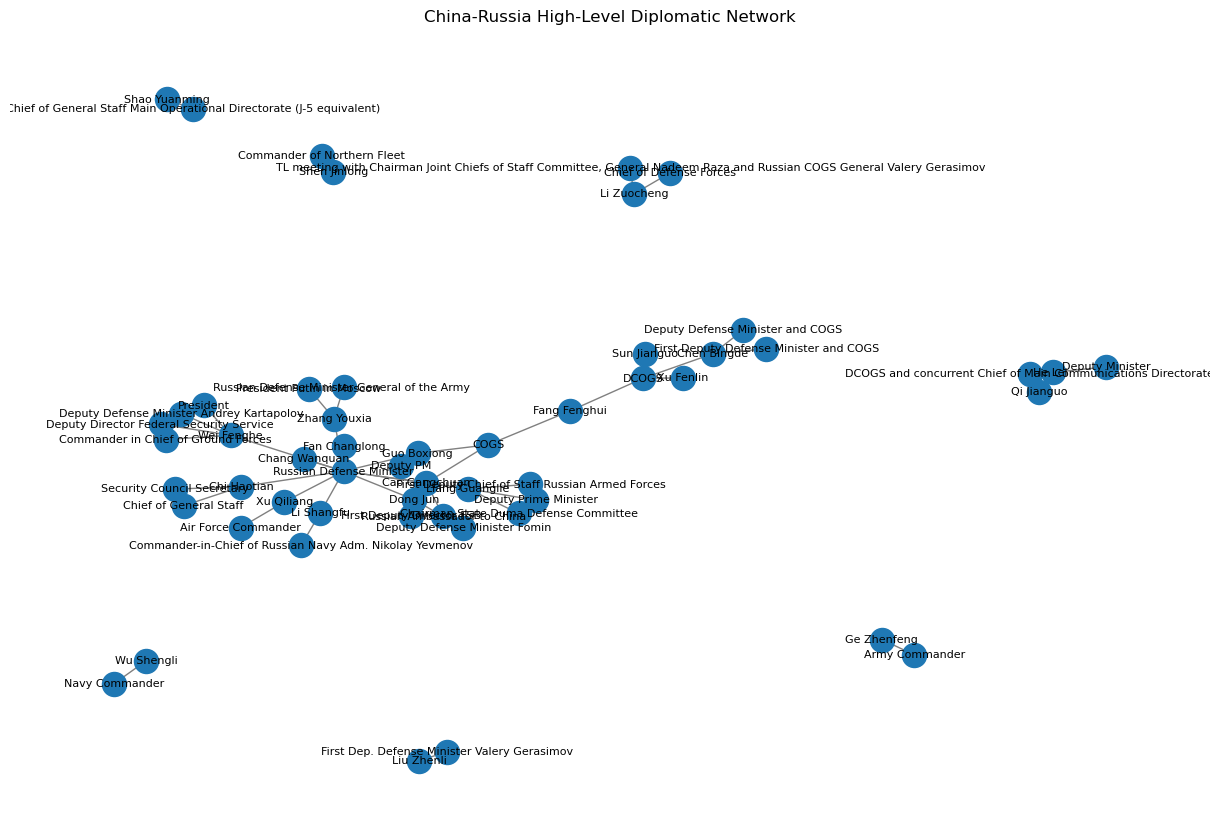

Most Connected Leaders:
Russian Defense Minister: 0.208
Wei Fenghe: 0.094
Cao Gangchuan: 0.075
Liang Guanglie: 0.075
DCOGS: 0.075
Chi Haotian: 0.057
Guo Boxiong: 0.057
COGS: 0.057
Chen Bingde: 0.057
Zhang Youxia: 0.057


In [13]:

# Create Graph
G = nx.Graph()

# Add edges (connections)
for index, row in df_network.iterrows():
    G.add_edge(row["Leader_A"], row["Leader_B"], year=row["Year"], visit_type=row["Visit_Type"])

# Draw the network
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_size=300, font_size=8, edge_color="gray")
plt.title("China-Russia High-Level Diplomatic Network")
plt.show()

# Analyze Centrality (Who is most connected?)
degree_centrality = nx.degree_centrality(G)
sorted_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
print("Most Connected Leaders:")
for leader, centrality in sorted_centrality[:10]:
    print(f"{leader}: {centrality:.3f}")


**Unclutter the layout.**

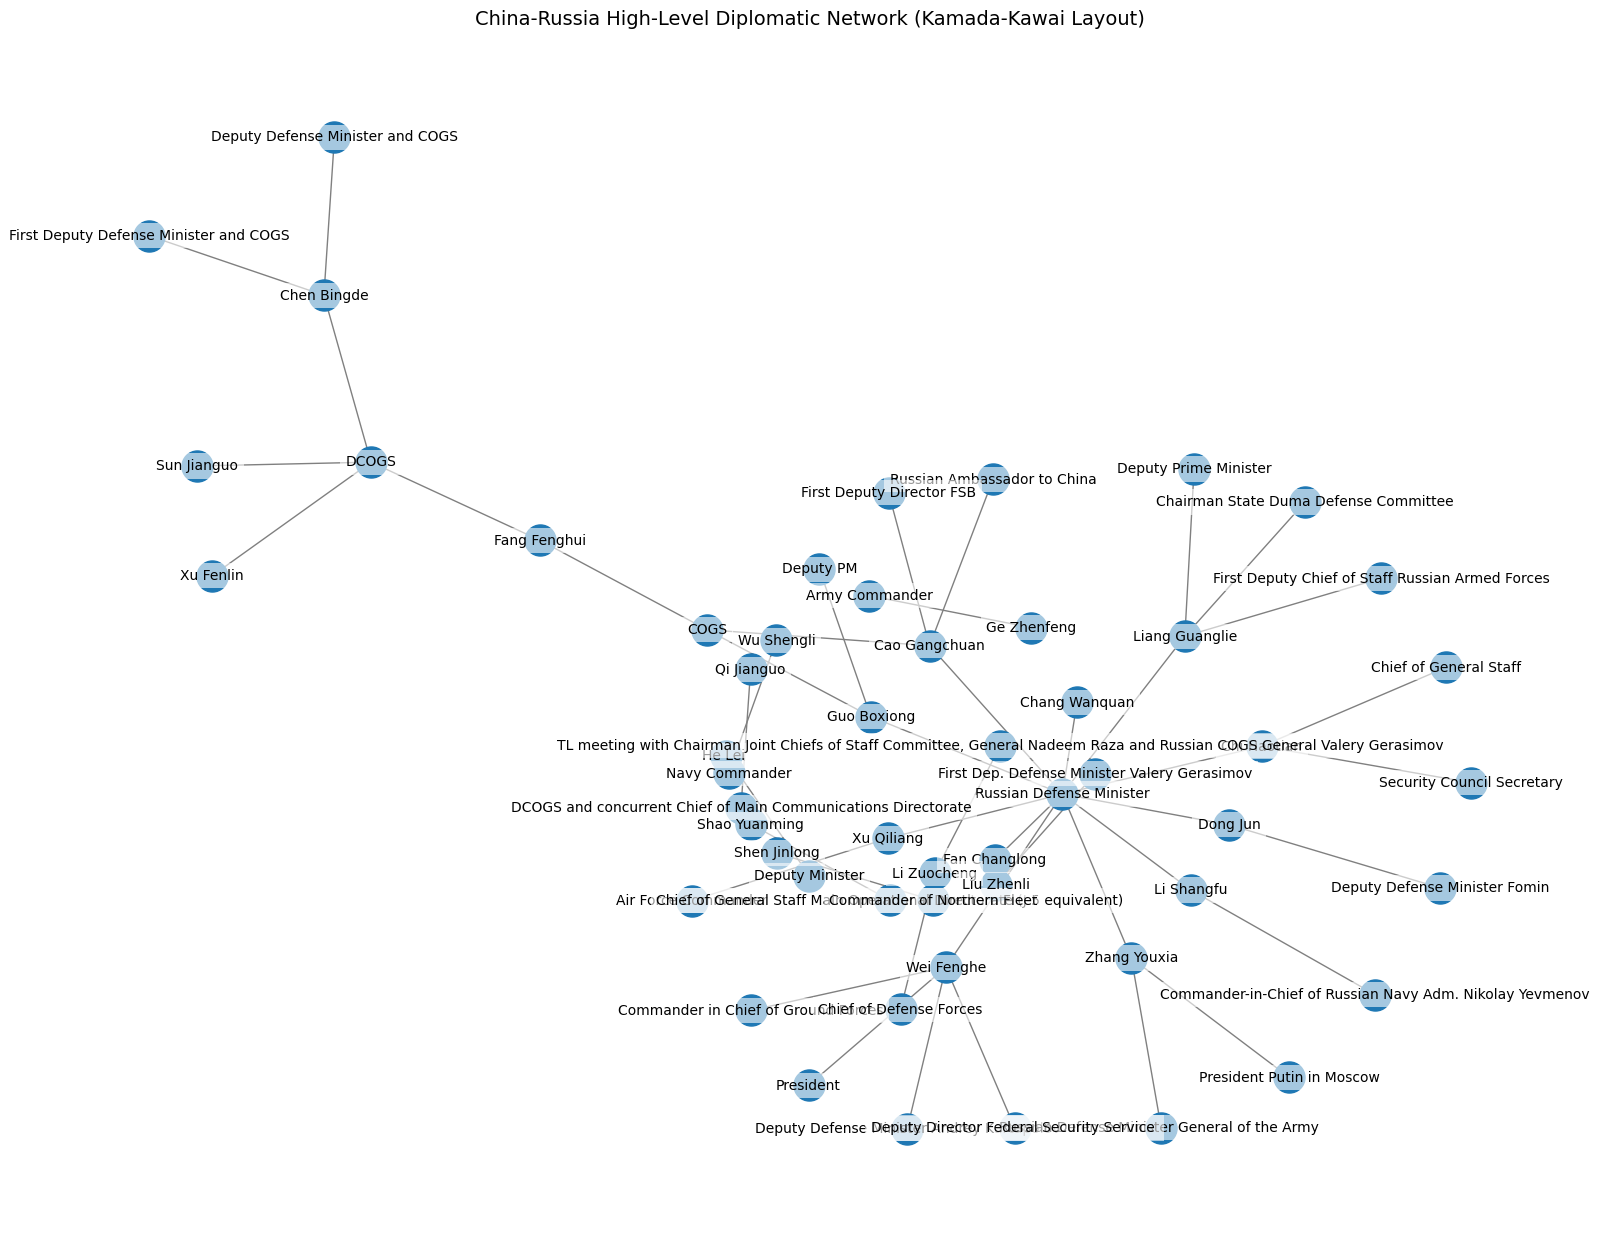

In [14]:

import networkx as nx

plt.figure(figsize=(16,12))
pos = nx.kamada_kawai_layout(G)  # Use Kamada-Kawai layout for better spacing

# Draw the graph without labels first
nx.draw(G, pos, with_labels=False, node_size=500, edge_color="gray")

# Define labels and draw them separately to reduce overlap
labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color="black", 
                        bbox=dict(facecolor="white", alpha=0.6, edgecolor="none"))

plt.title("China-Russia High-Level Diplomatic Network (Kamada-Kawai Layout)", fontsize=14)
plt.show()
